### Problem Statement

In [16]:
import tests.custom_tests as tests

N, values, weights, W_capacity = tests.random_test(7)

### Exact solution

In [17]:
from Dynamic_programming.classic_knapsack import Dynamic_Programming_QKP_solver

dp_solver = Dynamic_Programming_QKP_solver(W_capacity, weights, values)
items_in_solution = dp_solver.run()
dp_solver.show_results()

 - Solution has items:  [1]
Profit: 43
Weight: 26 (satisfies constraint W=27)
Energy: -43.923199999999994


### Simulated annealing

In [18]:
from Annealing_ham.QKP_ham import QKP_Hamiltonian

H_solver = QKP_Hamiltonian(W_capacity, weights, values)
H_solver.run_simulated_annealing()
H_solver.show_results()

# H_solver.energy_of_items(items_in_solution)


offset:  815.2649500000001
 - Solution has items:  [0, 4]
Profit: 213
Weight: 68 (does NOT satisfy constraint W=27)
Energy: -111.2626


[Qibo 0.2.7|WARNING|2024-05-04 16:36:59]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-05-04 16:36:59]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Exact solution has items:  [0, 4]
Target energy -111.26259999999999
final annealing energy:  133.53625016585664
Solution has items:  [0, 4]


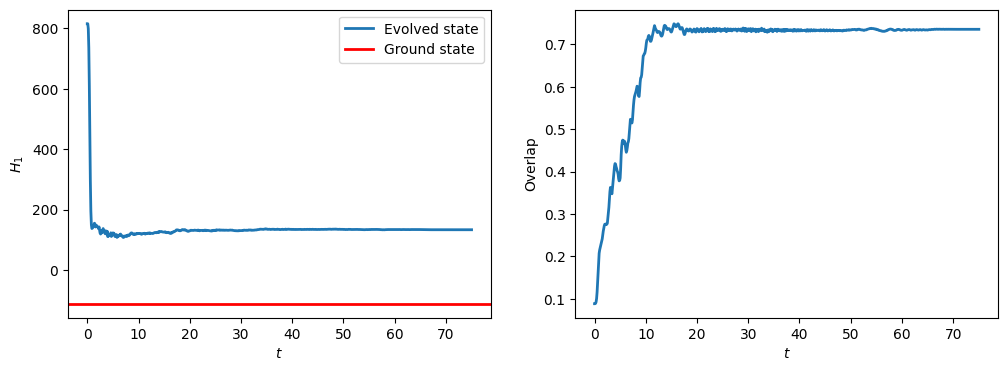

In [19]:
from QIBO_solver import QKP_Qibo_solver

T = 75 # Total time of the adiabatic evolution.

Qibo_solver = QKP_Qibo_solver(W_capacity, weights, values)
Qibo_solver.exact_solution()
Qibo_solver.run_simulated_annealing(T)
Qibo_solver.show_results()

### DMRG

In [20]:
from DMRG.script import QKP_DMRG

h_coeffs, J_coeffs, offset = H_solver.get_ham_coeffs()
chi = 32
numsweeps = 50
qkp_DMRG = QKP_DMRG(N, chi, numsweeps, h_coeffs, J_coeffs, offset)

s = 1 # time of annealing we want to simulate
qkp_DMRG.build_MPO_time_s(s)
qkp_DMRG.run()
qkp_DMRG.show_results()

# qkp_DMRG.energy_of_items('111')


AttributeError: 'QKP_DMRG' object has no attribute 'J'